In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as ss

In [7]:
df = pd.read_csv('bank.csv',sep=';')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df['y'] = df.y.map(dict(yes=1,no=0))

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


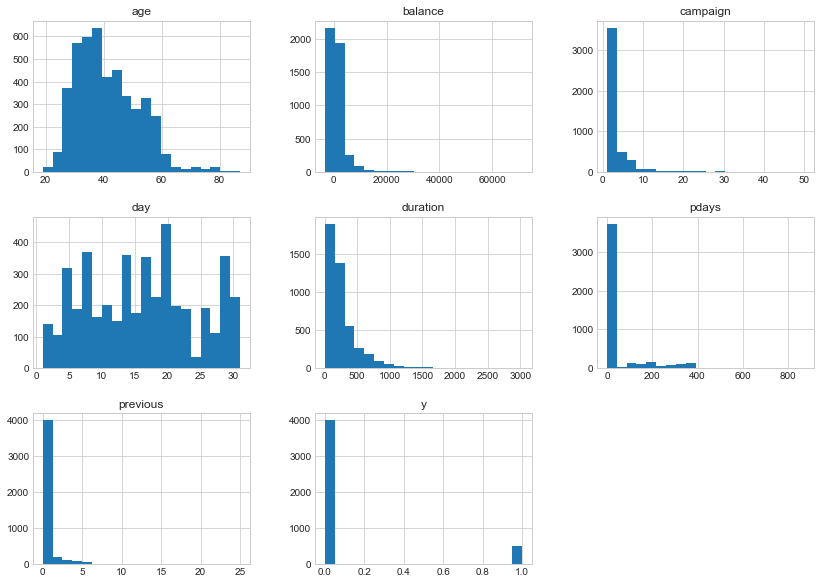

In [12]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20,figsize=(14,10))
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
dep_var = df['y']
encoder_df = df.copy()

In [16]:
encoder_df = encoder_df.drop(['y'],axis=1)

In [17]:
encoder_df = encoder_df.apply(encoder.fit_transform)

In [18]:
encoder_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3


In [19]:
encoder_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,22.168104,4.411192,1.147755,1.231365,0.016810,894.699624,0.566025,0.152842,0.652289,14.915284,5.540146,241.323380,1.783234,25.368503,0.539925,2.559168
std,10.568155,3.255716,0.599650,0.748744,0.128575,632.935320,0.495676,0.359875,0.901498,8.247667,3.002763,196.360039,2.997180,63.823284,1.661181,0.992051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,1.000000,0.000000,343.000000,0.000000,0.000000,0.000000,8.000000,3.000000,100.000000,0.000000,0.000000,0.000000,3.000000
50%,20.000000,4.000000,1.000000,1.000000,0.000000,697.000000,1.000000,0.000000,0.000000,15.000000,6.000000,181.000000,1.000000,0.000000,0.000000,3.000000
75%,30.000000,7.000000,2.000000,2.000000,0.000000,1354.000000,1.000000,0.000000,2.000000,20.000000,8.000000,325.000000,2.000000,0.000000,0.000000,3.000000
max,66.000000,11.000000,2.000000,3.000000,1.000000,2352.000000,1.000000,1.000000,2.000000,30.000000,11.000000,874.000000,31.000000,291.000000,23.000000,3.000000


In [20]:
encoder_df2 = pd.concat([encoder_df,dep_var],axis=1)

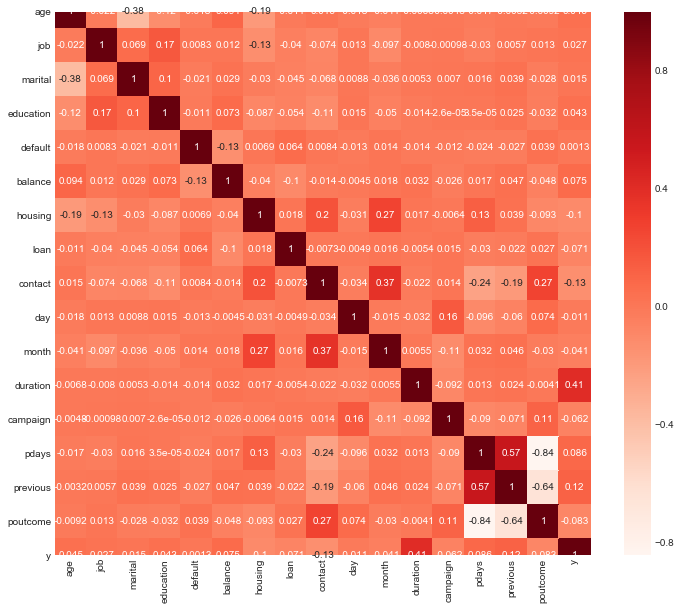

In [23]:
plt.figure(figsize=(12,10))
cor = encoder_df2.corr()
ss.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [30]:
cor_target = abs(cor['y'])
relevant = cor_target[cor_target > 0.1]
print(relevant,'\n')

housing     0.104683
contact     0.133595
duration    0.406754
previous    0.119566
y           1.000000
Name: y, dtype: float64 



In [31]:
feature_cors = encoder_df[['duration','pdays']].corr()
feature_cors

,duration,pdays
duration,1.000000,0.013331
pdays,0.013331,1.000000


In [34]:
feature_cors1 = encoder_df[['housing','previous']].corr()
feature_cors1

,housing,previous
housing,1.00000,0.03878
previous,0.03878,1.00000


In [36]:
encoder_df = encoder_df.drop(['age','housing',
                             'loan','default'],axis=1)

In [39]:
#ml

train_len = int(.8 * (df.shape[0]))
train_len

3616

In [40]:
train_x,train_y = encoder_df[:train_len],dep_var[:train_len]
test_x,test_y = encoder_df[train_len:],dep_var[train_len:]

In [41]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_reg = LogisticRegression(solver='lbfgs',
                             penalty='l2',max_iter=1000000)


In [58]:
log_reg_trained = log_reg.fit(train_x,train_y)

In [59]:
print(log_reg.score(train_x,train_y))

0.8896570796460177


In [60]:
pred = log_reg.predict(test_x)

In [61]:
print(f'test score = {sk.metrics.accuracy_score(test_y,pred)}')

test score = 0.8861878453038674


In [62]:
#decission tree

from sklearn.tree import DecisionTreeClassifier

In [64]:
dec_tree = DecisionTreeClassifier()

In [65]:
tree_model = dec_tree.fit(train_x,train_y)

In [66]:
#accuracy
print(dec_tree.score(train_x,train_y))

1.0


In [67]:
pred = dec_tree.predict(test_x)

In [68]:
#test accuray

print(sk.metrics.accuracy_score(test_y,pred))

0.856353591160221


In [69]:
from aix360.algorithms.lime import LimeTabularExplainer

In [71]:
class_name = [0,1]
log_lime_explainer = LimeTabularExplainer(train_x.values,class_names=class_name,
                                         feature_names = train_x.columns)

In [72]:
print('Predicted class id=',log_reg_trained.predict_proba([train_x.values[0]]))

Predicted class id= [[0.95117948 0.04882052]]


In [73]:
print('true class is=',train_y.loc[0])

true class is= 0


In [75]:
idx = 1120
exp_log = log_lime_explainer.explain_instance(train_x.values[idx],
                                             log_reg_trained.predict_proba,
                                             num_features = 6,
                                             labels= class_name)

In [76]:
print('Explanation for class',class_name[0])
print('\n'.join(map(str,exp_log.as_list(label=0))))

Explanation for class 0
('100.00 < duration <= 180.00', 0.08947350899597402)
('contact <= 0.00', -0.069818931001328)
('previous <= 0.00', 0.04463979772693334)
('campaign <= 0.00', -0.017327862080429288)
('education <= 1.00', 0.010511376269648853)
('8.00 < day <= 15.00', -0.009353996580702007)


In [77]:
print('Explanation for class',class_name[1])
print('\n'.join(map(str,exp_log.as_list(label=1))))

Explanation for class 1
('100.00 < duration <= 180.00', -0.08947350899597406)
('contact <= 0.00', 0.069818931001328)
('previous <= 0.00', -0.04463979772693331)
('campaign <= 0.00', 0.017327862080429277)
('education <= 1.00', -0.010511376269648862)
('8.00 < day <= 15.00', 0.00935399658070202)


In [81]:
exp_log.show_in_notebook()

In [82]:
from aix360.metrics import faithfulness_metric,monotonicity_metric

In [85]:
predicted_class = log_reg.predict(test_x.values[0].reshape(1,-1))[0]

le = exp_log.local_exp[predicted_class]

m = exp_log.as_map()

x = test_x.values[0]
coef = np.zeros(x.shape[0])

for i in le:
    coef[i[0]] = i[1]

base = np.zeros(x.shape[0])

print('faithfulness_metric',faithfulness_metric(log_reg,x,coef,base))
print('faithfulness_metric',monotonicity_metric(log_reg,x,coef,base))

faithfulness_metric -0.5308633423173376
faithfulness_metric False
